In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
data = pd.read_csv('../data/catan/catanstats.csv', sep = ',', engine = 'python',\
                   names=['gameNum', 'player', 'points', 'me', '2', '3', '4', '5', '6', '7', '8',\
                          '9', '10', '11', '12', 'settlement1_resourse_1_dice', 'settlement1_resourse_1_name',\
                          'settlement1_resourse_2_dice', 'settlement1_resourse_2_name',\
                          'settlement1_resourse_3_dice', 'settlement1_resourse_3_name',\
                          'settlement2_resourse_1_dice', 'settlement2_resourse_1_name',\
                          'settlement2_resourse_2_dice', 'settlement2_resourse_2_name',\
                          'settlement2_resourse_3_dice', 'settlement2_resourse_3_name',\
                          'production', 'tradeGain', 'robberCardsGain',
                          'totalGain', 'tradeLoss', 'robberCardsLoss', 'tribute', 'totalLoss',\
                          'totalAvailable'], header = 0)

Я позволил себе сразу сменить часть названий колонок, после прочтения описания:
- *было* `['gameNum', 'player', 'points', 'me', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', 'settlement1', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'settlement2', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'production', 'tradeGain', 'robberCardsGain', 'totalGain', 'tradeLoss', 'robberCardsLoss', 'tribute', 'totalLoss', 'totalAvailable']`

- *стало* `['gameNum', 'player', 'points', 'me', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', 'settlement1_resourse_1_dice', 'settlement1_resourse_1_name', 'settlement1_resourse_2_dice', 'settlement1_resourse_2_name', 'settlement1_resourse_3_dice', 'settlement1_resourse_3_name', 'settlement2_resourse_1_dice', 'settlement2_resourse_1_name', 'settlement2_resourse_2_dice', 'settlement2_resourse_2_name', 'settlement2_resourse_3_dice', 'settlement2_resourse_3_name', 'production', 'tradeGain', 'robberCardsGain', 'totalGain', 'tradeLoss', 'robberCardsLoss', 'tribute', 'totalLoss', 'totalAvailable']`

In [3]:
data.columns

Index(['gameNum', 'player', 'points', 'me', '2', '3', '4', '5', '6', '7', '8',
       '9', '10', '11', '12', 'settlement1_resourse_1_dice',
       'settlement1_resourse_1_name', 'settlement1_resourse_2_dice',
       'settlement1_resourse_2_name', 'settlement1_resourse_3_dice',
       'settlement1_resourse_3_name', 'settlement2_resourse_1_dice',
       'settlement2_resourse_1_name', 'settlement2_resourse_2_dice',
       'settlement2_resourse_2_name', 'settlement2_resourse_3_dice',
       'settlement2_resourse_3_name', 'production', 'tradeGain',
       'robberCardsGain', 'totalGain', 'tradeLoss', 'robberCardsLoss',
       'tribute', 'totalLoss', 'totalAvailable'],
      dtype='object')

In [4]:
type(data)

pandas.core.frame.DataFrame

In [5]:
data

,gameNum,player,points,me,2,3,4,5,6,7,...,settlement2_resourse_3_name,production,tradeGain,robberCardsGain,totalGain,tradeLoss,robberCardsLoss,tribute,totalLoss,totalAvailable
0,1,1,5,NaN,1,3,5,8,7,10,...,O,38,5,2,45,10,2,4,16,29
1,1,2,9,1.0,1,3,5,8,7,10,...,O,48,8,6,62,11,1,8,20,42
2,1,3,10,NaN,1,3,5,8,7,10,...,C,44,14,9,67,24,4,0,28,39
3,1,4,5,NaN,1,3,5,8,7,10,...,S,42,12,0,54,24,6,0,30,24
4,2,1,10,NaN,1,6,3,9,10,8,...,2L,60,15,16,91,28,10,0,38,53
5,2,2,6,NaN,1,6,3,9,10,8,...,W,57,12,1,70,26,6,8,40,30
6,2,3,4,1.0,1,6,3,9,10,8,...,L,44,10,8,62,18,6,8,32,30
7,2,4,9,NaN,1,6,3,9,10,8,...,S,61,16,11,88,25,6,4,35,53
8,3,1,5,NaN,0,3,3,10,10,4,...,S,44,5,5,54,11,1,9,21,33
9,3,2,10,NaN,0,3,3,10,10,4,...,S,41,4,9,54,8,3,0,11,43


In [6]:
data.index

RangeIndex(start=0, stop=200, step=1)

In [7]:
data.head()

,gameNum,player,points,me,2,3,4,5,6,7,...,settlement2_resourse_3_name,production,tradeGain,robberCardsGain,totalGain,tradeLoss,robberCardsLoss,tribute,totalLoss,totalAvailable
0,1,1,5,NaN,1,3,5,8,7,10,...,O,38,5,2,45,10,2,4,16,29
1,1,2,9,1.0,1,3,5,8,7,10,...,O,48,8,6,62,11,1,8,20,42
2,1,3,10,NaN,1,3,5,8,7,10,...,C,44,14,9,67,24,4,0,28,39
3,1,4,5,NaN,1,3,5,8,7,10,...,S,42,12,0,54,24,6,0,30,24
4,2,1,10,NaN,1,6,3,9,10,8,...,2L,60,15,16,91,28,10,0,38,53


In [8]:
data.tail()

,gameNum,player,points,me,2,3,4,5,6,7,...,settlement2_resourse_3_name,production,tradeGain,robberCardsGain,totalGain,tradeLoss,robberCardsLoss,tribute,totalLoss,totalAvailable
195,49,4,5,NaN,0,5,3,6,13,13,...,S,41,8,11,60,22,4,0,26,34
196,50,1,5,NaN,1,7,4,5,7,17,...,C,41,6,7,54,14,6,4,24,30
197,50,2,10,1.0,1,7,4,5,7,17,...,C,64,5,9,78,15,6,10,31,47
198,50,3,4,NaN,1,7,4,5,7,17,...,S,44,7,4,55,22,1,8,31,24
199,50,4,8,NaN,1,7,4,5,7,17,...,C,57,3,5,65,2,12,8,22,43


In [9]:
print(data.shape)
print(data.columns)

(200, 36)
Index(['gameNum', 'player', 'points', 'me', '2', '3', '4', '5', '6', '7', '8',
       '9', '10', '11', '12', 'settlement1_resourse_1_dice',
       'settlement1_resourse_1_name', 'settlement1_resourse_2_dice',
       'settlement1_resourse_2_name', 'settlement1_resourse_3_dice',
       'settlement1_resourse_3_name', 'settlement2_resourse_1_dice',
       'settlement2_resourse_1_name', 'settlement2_resourse_2_dice',
       'settlement2_resourse_2_name', 'settlement2_resourse_3_dice',
       'settlement2_resourse_3_name', 'production', 'tradeGain',
       'robberCardsGain', 'totalGain', 'tradeLoss', 'robberCardsLoss',
       'tribute', 'totalLoss', 'totalAvailable'],
      dtype='object')


- `gameNum` - each game I played has 4 corresponding rows, 1 per player. 

- `player` - the starting position corresponding to each row

- `points` - how many points the player ended the game with (the game is won with 10 or more)

- `me` - the position I played during the game

- `2`, `3`, ..., `12` - how many rolls of each value occurred during the game (game is played with 2 dice)

- `settlement1`, `settlement2` - each starting settlement is logged as 3 pairs of [number, resource]:

- `L` - lumber

- `C` - clay

- `S` - sheep

- `W` - wheat

- `O` - ore

- `3G` - 3:1 general port

- `2(X)` - 2:1 port for resource `X`

- `D` - desert

`EX`: in game 1, player 1's first settlement was on a 6-lumber, 3-clay, and 11-clay.

- `production` - total cards gained from settlements and cities during game

- `tradeGain`- total cards gained from peer AND bank trades during game

- `robberCardsGain` - total cards gained from stealing with the robber, plus cards gained with non-knight development cards. A road building card is +4 resources.

- `totalGain` - sum of previous 3 columns.

- `tradeLoss` - total cards lost from peer AND bank trades during game

- `robberCardsLoss` - total cards lost from robbers, knights, and other players' monopoly cards

- `tribute` - total cards lost when player had to discard on a 7 roll (separate from previous column.)

- `totalLoss` - sum of previous 3 columns.

- `totalAvailable` - totalGain minus totalLoss.

Выше описание данных от автора датасета, со своей стороны, т.к. я играл в эту игру и знаю правила, хотелось бы пояснить некоторые моменты:
- играют 4 игрока, на поле присутствует по 2 поселения для каждого из них (итого 8), один разбойник.
- бросок костей с суммой равной 7 означает передвижение разбойника с клетки пустыни на любую из клеток ресурсов, тем самым блокируя сбор с той клетки + все игроки обязаны скинуть половину из своих ресурсов, если их накопилось больше 7 карт.

In [10]:
data.index

RangeIndex(start=0, stop=200, step=1)

In [11]:
data.at[2, 'production']

44

In [12]:
data['production']

0      38
1      48
2      44
3      42
4      60
5      57
6      44
7      61
8      44
9      41
10     47
11     53
12     64
13     97
14     61
15     75
16     70
17     56
18     30
19     48
20     48
21     35
22     35
23     56
24     43
25     31
26     31
27     30
28     48
29     61
       ..
170    71
171    31
172    86
173    47
174    77
175    56
176    46
177    55
178    26
179    47
180    36
181    53
182    46
183    70
184    32
185    61
186    43
187    37
188    72
189    67
190    43
191    31
192    47
193    77
194    29
195    41
196    41
197    64
198    44
199    57
Name: production, Length: 200, dtype: int64

In [13]:
data['production'][3]

42

In [14]:
data['production'].dtype.name

'int64'

In [15]:
type(data['production'])

pandas.core.series.Series

In [16]:
type(data['production'][3])

numpy.int64

In [17]:
data[['production', 'robberCardsGain']].head()

,production,robberCardsGain
0,38,2
1,48,6
2,44,9
3,42,0
4,60,16


In [18]:
data.describe()

,gameNum,player,points,me,2,3,4,5,6,7,...,settlement2_resourse_3_dice,production,tradeGain,robberCardsGain,totalGain,tradeLoss,robberCardsLoss,tribute,totalLoss,totalAvailable
count,200.000000,200.00000,200.000000,50.0,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,...,200.000000,200.000000,200.00000,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,25.500000,2.50000,7.255000,1.0,1.700000,3.960000,4.700000,7.400000,9.160000,10.980000,...,6.660000,51.880000,8.58000,6.480000,66.94000,17.780000,5.310000,5.065000,28.155000,38.785000
std,14.467083,1.12084,2.154806,0.0,1.449311,1.984462,1.925758,2.232694,3.069447,4.830764,...,4.661874,15.439153,4.38861,4.619121,19.83592,9.285077,3.970228,5.352008,12.078927,11.058491
min,1.000000,1.00000,2.000000,1.0,0.000000,0.000000,0.000000,1.000000,3.000000,2.000000,...,0.000000,19.000000,1.00000,0.000000,23.00000,2.000000,0.000000,0.000000,7.000000,8.000000
25%,13.000000,1.75000,6.000000,1.0,1.000000,3.000000,3.000000,6.000000,7.000000,7.000000,...,2.750000,41.000000,5.00000,3.000000,54.00000,11.000000,2.000000,0.000000,20.000000,31.000000
50%,25.500000,2.50000,7.000000,1.0,1.000000,3.500000,5.000000,7.000000,9.500000,10.000000,...,10.000000,51.000000,8.00000,5.000000,65.00000,16.000000,5.000000,4.000000,25.000000,39.000000
75%,38.000000,3.25000,9.250000,1.0,3.000000,5.000000,6.000000,9.000000,11.000000,14.000000,...,11.000000,61.000000,11.25000,9.000000,80.00000,23.250000,7.250000,8.000000,35.000000,46.250000
max,50.000000,4.00000,12.000000,1.0,6.000000,9.000000,10.000000,13.000000,16.000000,23.000000,...,12.000000,97.000000,21.00000,20.000000,133.00000,47.000000,21.000000,33.000000,72.000000,77.000000


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:2782: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=1.0, right=1.0
  'left=%s, right=%s') % (left, right))
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:3040: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=1.0, top=1.0
  'bottom=%s, top=%s') % (bottom, top))


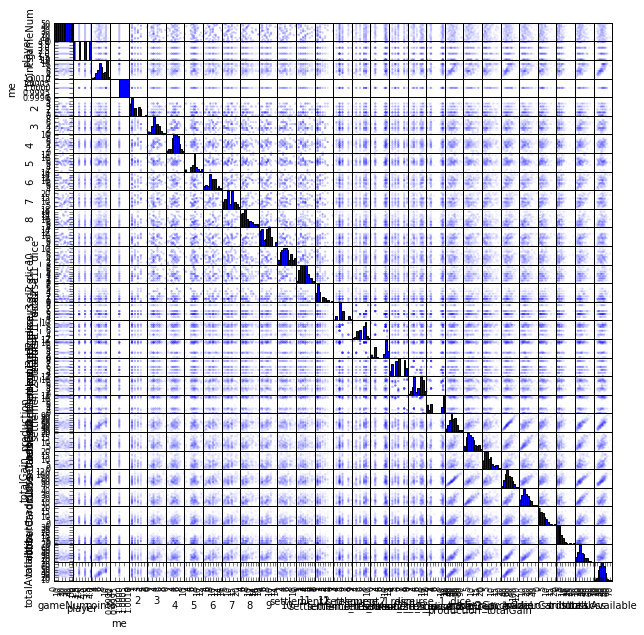

In [19]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(data, alpha = .05, figsize = (10, 10))
pass

In [20]:
data.corr()

,gameNum,player,points,me,2,3,4,5,6,7,...,settlement2_resourse_3_dice,production,tradeGain,robberCardsGain,totalGain,tradeLoss,robberCardsLoss,tribute,totalLoss,totalAvailable
gameNum,1.000000,0.000000,-0.042314,NaN,0.054164,0.077715,-0.107140,-0.232116,0.007695,0.029768,...,0.013561,-0.040361,-0.132256,0.015040,-0.057174,-0.057349,-0.016010,0.036572,-0.033142,-0.066354
player,0.000000,1.000000,-0.023927,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.044239,0.015681,-0.052101,-0.078619,-0.017630,-0.034766,0.016939,0.063246,0.006867,-0.039123
points,-0.042314,-0.023927,1.000000,NaN,-0.009172,0.038827,0.145681,0.012116,0.147273,0.076284,...,0.160247,0.655416,0.358379,0.373866,0.676489,0.367756,0.296741,0.052151,0.403337,0.772881
me,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.054164,0.000000,-0.009172,NaN,1.000000,0.121605,0.133234,-0.080753,-0.084042,0.306333,...,-0.064260,0.094501,-0.004898,0.119200,0.100228,0.013369,0.120168,0.178739,0.128971,0.038910
3,0.077715,0.000000,0.038827,NaN,0.121605,1.000000,0.438660,-0.028127,0.195751,0.224269,...,0.013188,0.168613,-0.010594,0.251539,0.187470,0.095245,0.248413,0.086357,0.193129,0.125319
4,-0.107140,0.000000,0.145681,NaN,0.133234,0.438660,1.000000,-0.186998,0.198590,0.342899,...,0.003135,0.292360,-0.006659,0.248451,0.283939,0.112920,0.244891,0.050658,0.189740,0.302060
5,-0.232116,0.000000,0.012116,NaN,-0.080753,-0.028127,-0.186998,1.000000,0.119668,0.134927,...,-0.062666,0.036532,0.076210,0.068508,0.061249,0.022204,0.093084,0.091592,0.088247,0.013473
6,0.007695,0.000000,0.147273,NaN,-0.084042,0.195751,0.198590,0.119668,1.000000,0.290315,...,0.014005,0.406216,0.237793,0.212883,0.418360,0.335896,0.179407,0.176476,0.395367,0.318573
7,0.029768,0.000000,0.076284,NaN,0.306333,0.224269,0.342899,0.134927,0.290315,1.000000,...,-0.021725,0.358882,0.187093,0.332605,0.398179,0.270349,0.394386,0.319778,0.479138,0.190874


Логично, что параметры, напрямую зависящие друг от друга, показывают почти линейную зависимость :)

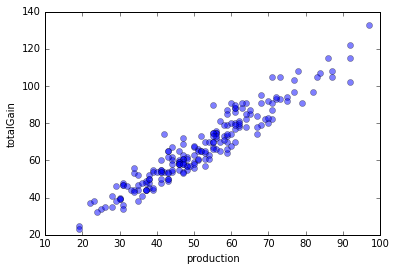

In [21]:
plt.plot(data['production'], data['totalGain'], 'o', alpha = 0.5)
plt.xlabel('production')
plt.ylabel('totalGain')
pass

Так как в моих данных нет очевидных интересных коррелирующих признаков, покажем что мы умеем рисовать красивые графики :)

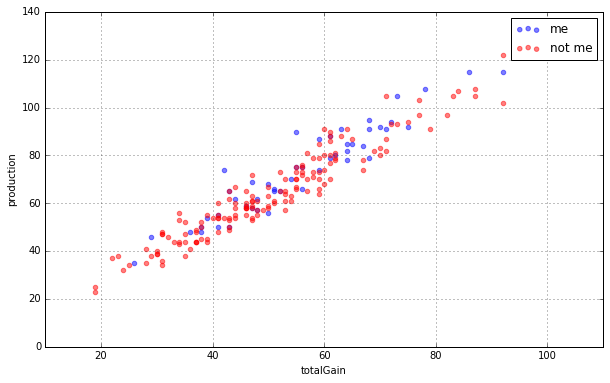

In [22]:
plt.figure(figsize = (10, 6))

plt.scatter(data[data['me'] == 1]['production'],
            data[data['me'] == 1]['totalGain'],
            alpha = 0.5,
            label = 'me',
            color = 'b')

plt.scatter(data[data['me'] != 1]['production'],
            data[data['me'] != 1]['totalGain'],
            alpha = 0.5,
            label = 'not me',
            color = 'r')

plt.xlabel('totalGain')
plt.ylabel('production')
plt.legend()
plt.grid()

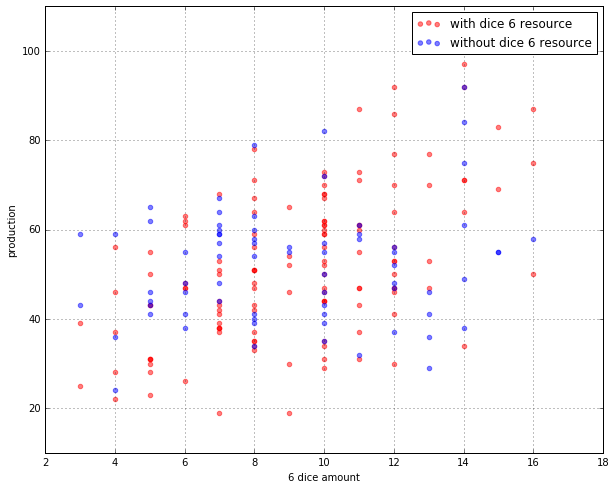

In [23]:
plt.figure(figsize = (10, 8))

plt.scatter(data[(data['settlement2_resourse_3_dice'] == 6)|(data['settlement2_resourse_2_dice'] == 6)\
                |(data['settlement2_resourse_1_dice'] == 6)|(data['settlement1_resourse_1_dice'] == 6)\
                |(data['settlement1_resourse_2_dice'] == 6)|(data['settlement1_resourse_3_dice'] == 6)]['6'],
            
            data[(data['settlement2_resourse_3_dice'] == 6)|(data['settlement2_resourse_2_dice'] == 6)\
                |(data['settlement2_resourse_1_dice'] == 6)|(data['settlement1_resourse_1_dice'] == 6)\
                |(data['settlement1_resourse_2_dice'] == 6)|(data['settlement1_resourse_3_dice'] == 6)]['production'],
            alpha = 0.5,
            label = 'with dice 6 resource',
            color = 'r')

plt.scatter(data[(data['settlement2_resourse_3_dice'] != 6)&(data['settlement2_resourse_2_dice'] != 6)\
                 &(data['settlement2_resourse_1_dice'] != 6)&(data['settlement1_resourse_1_dice'] != 6)\
                &(data['settlement1_resourse_2_dice'] != 6)&(data['settlement1_resourse_3_dice'] != 6)]['6'],
            data[(data['settlement2_resourse_3_dice'] != 6)&(data['settlement2_resourse_2_dice'] != 6)\
                 &(data['settlement2_resourse_1_dice'] != 6)&(data['settlement1_resourse_1_dice'] != 6)\
                &(data['settlement1_resourse_2_dice'] != 6)&(data['settlement1_resourse_3_dice'] != 6)]['production'],
            alpha = 0.5,
            label = 'without dice 6 resource',
            color = 'b')

plt.xlabel('6 dice amount')
plt.ylabel('production')
plt.legend()
plt.grid()

In [24]:
data.describe(include = ['object'])

,settlement1_resourse_1_name,settlement1_resourse_2_name,settlement1_resourse_3_name,settlement2_resourse_1_name,settlement2_resourse_2_name,settlement2_resourse_3_name
count,200,200,200,200,200,200
unique,5,5,10,5,6,13
top,O,W,W,W,L,S
freq,51,51,55,53,45,43


In [25]:
data['settlement1_resourse_1_name'].unique()

array(['L', 'W', 'S', 'O', 'C'], dtype=object)

In [26]:
data['settlement1_resourse_2_name'].unique()

array(['C', 'O', 'S', 'L', 'W'], dtype=object)

In [27]:
for name in data['settlement1_resourse_1_name'].unique():
    print(name, data['settlement1_resourse_1_dice'][data['settlement1_resourse_1_name'] == name].iloc[0])

L 6
W 5
S 5
O 6
C 5


## Задача

Определить победителя в конце игры

# Готовим данные

In [28]:
data['settlement1_resourse_1_name'].dtype.name

'object'

In [29]:
data['settlement1_resourse_1_dice'].dtype.name

'int64'

In [30]:
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']
numerical_columns   = [c for c in data.columns if data[c].dtype.name != 'object']
print(categorical_columns)
print(numerical_columns)

['settlement1_resourse_1_name', 'settlement1_resourse_2_name', 'settlement1_resourse_3_name', 'settlement2_resourse_1_name', 'settlement2_resourse_2_name', 'settlement2_resourse_3_name']
['gameNum', 'player', 'points', 'me', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', 'settlement1_resourse_1_dice', 'settlement1_resourse_2_dice', 'settlement1_resourse_3_dice', 'settlement2_resourse_1_dice', 'settlement2_resourse_2_dice', 'settlement2_resourse_3_dice', 'production', 'tradeGain', 'robberCardsGain', 'totalGain', 'tradeLoss', 'robberCardsLoss', 'tribute', 'totalLoss', 'totalAvailable']


In [31]:
for c in categorical_columns:
    print(c, data[c].unique())

settlement1_resourse_1_name ['L' 'W' 'S' 'O' 'C']
settlement1_resourse_2_name ['C' 'O' 'S' 'L' 'W']
settlement1_resourse_3_name ['C' 'W' 'L' 'O' 'S' '2S' '3G' '2W' '2L' 'D']
settlement2_resourse_1_name ['L' 'O' 'W' 'C' 'S']
settlement2_resourse_2_name ['W' 'S' 'L' 'C' 'O' '2O']
settlement2_resourse_3_name ['O' 'C' 'S' '2L' 'W' 'L' '3G' '2S' 'D' '2O' '2W' 'B' '2C']


## Обрабатываем пропущенные значения

В нашем случае, данные полны, нужно только заполнить пропуски в колонке `me`

In [32]:
data['me'].fillna(0,inplace = True)

In [33]:
data.describe()

,gameNum,player,points,me,2,3,4,5,6,7,...,settlement2_resourse_3_dice,production,tradeGain,robberCardsGain,totalGain,tradeLoss,robberCardsLoss,tribute,totalLoss,totalAvailable
count,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,...,200.000000,200.000000,200.00000,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,25.500000,2.50000,7.255000,0.250000,1.700000,3.960000,4.700000,7.400000,9.160000,10.980000,...,6.660000,51.880000,8.58000,6.480000,66.94000,17.780000,5.310000,5.065000,28.155000,38.785000
std,14.467083,1.12084,2.154806,0.434099,1.449311,1.984462,1.925758,2.232694,3.069447,4.830764,...,4.661874,15.439153,4.38861,4.619121,19.83592,9.285077,3.970228,5.352008,12.078927,11.058491
min,1.000000,1.00000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,2.000000,...,0.000000,19.000000,1.00000,0.000000,23.00000,2.000000,0.000000,0.000000,7.000000,8.000000
25%,13.000000,1.75000,6.000000,0.000000,1.000000,3.000000,3.000000,6.000000,7.000000,7.000000,...,2.750000,41.000000,5.00000,3.000000,54.00000,11.000000,2.000000,0.000000,20.000000,31.000000
50%,25.500000,2.50000,7.000000,0.000000,1.000000,3.500000,5.000000,7.000000,9.500000,10.000000,...,10.000000,51.000000,8.00000,5.000000,65.00000,16.000000,5.000000,4.000000,25.000000,39.000000
75%,38.000000,3.25000,9.250000,0.250000,3.000000,5.000000,6.000000,9.000000,11.000000,14.000000,...,11.000000,61.000000,11.25000,9.000000,80.00000,23.250000,7.250000,8.000000,35.000000,46.250000
max,50.000000,4.00000,12.000000,1.000000,6.000000,9.000000,10.000000,13.000000,16.000000,23.000000,...,12.000000,97.000000,21.00000,20.000000,133.00000,47.000000,21.000000,33.000000,72.000000,77.000000


In [34]:
data[numerical_columns].count(axis = 0)

gameNum                        200
player                         200
points                         200
me                             200
2                              200
3                              200
4                              200
5                              200
6                              200
7                              200
8                              200
9                              200
10                             200
11                             200
12                             200
settlement1_resourse_1_dice    200
settlement1_resourse_2_dice    200
settlement1_resourse_3_dice    200
settlement2_resourse_1_dice    200
settlement2_resourse_2_dice    200
settlement2_resourse_3_dice    200
production                     200
tradeGain                      200
robberCardsGain                200
totalGain                      200
tradeLoss                      200
robberCardsLoss                200
tribute                        200
totalLoss           

In [35]:
data[categorical_columns].count(axis = 0)

settlement1_resourse_1_name    200
settlement1_resourse_2_name    200
settlement1_resourse_3_name    200
settlement2_resourse_1_name    200
settlement2_resourse_2_name    200
settlement2_resourse_3_name    200
dtype: int64

In [36]:
data['me'].describe()

count    200.000000
mean       0.250000
std        0.434099
min        0.000000
25%        0.000000
50%        0.000000
75%        0.250000
max        1.000000
Name: me, dtype: float64

In [37]:
type(data['me'].describe())

pandas.core.series.Series

In [38]:
data_describe = data.describe(include ='all')

## Векторизация

Нужно что-то сделать с категориальными (номинальными) признаками

In [39]:
binary_columns    = [c for c in categorical_columns if data_describe[c]['unique'] == 2]
nonbinary_columns = [c for c in categorical_columns if data_describe[c]['unique'] > 2]
print(binary_columns, nonbinary_columns)

[] ['settlement1_resourse_1_name', 'settlement1_resourse_2_name', 'settlement1_resourse_3_name', 'settlement2_resourse_1_name', 'settlement2_resourse_2_name', 'settlement2_resourse_3_name']


К небинарными признакам применим метод _векторизации_, 
который заключается в следующем.

Признак `j`, принимающий `s` значений, заменим на `s` признаков, принимащих значения `0` или `1`,
в зависимости от того, чему равно значение исходного признака `j`.

Например, в нашей задаче признак `race` принимает 5 различных значений: 

In [40]:
data['settlement1_resourse_1_name'].unique()

array(['L', 'W', 'S', 'O', 'C'], dtype=object)

Заменим признак `settlement1_resourse_1_name` 5 признаками: `settlement1_resourse_1_name_L`, ..., `settlement1_resourse_1_name_C`.

 - Если признак `settlement1_resourse_1_name` принимает значение `L`, то признак `settlement1_resourse_1_name_L` равен `1`, а все остальные равны `0`.
 - Если признак `settlement1_resourse_1_name` принимает значение `C`, то признак `settlement1_resourse_1_name_C` равен `1`, а все остальные равны `0`.
 - и т.д.

Такую векторизацию осуществляет в pandas метод `get_dummies`:

In [41]:
data_nonbinary = pd.get_dummies(data[nonbinary_columns])
print(data_nonbinary.columns)

Index(['settlement1_resourse_1_name_C', 'settlement1_resourse_1_name_L',
       'settlement1_resourse_1_name_O', 'settlement1_resourse_1_name_S',
       'settlement1_resourse_1_name_W', 'settlement1_resourse_2_name_C',
       'settlement1_resourse_2_name_L', 'settlement1_resourse_2_name_O',
       'settlement1_resourse_2_name_S', 'settlement1_resourse_2_name_W',
       'settlement1_resourse_3_name_2L', 'settlement1_resourse_3_name_2S',
       'settlement1_resourse_3_name_2W', 'settlement1_resourse_3_name_3G',
       'settlement1_resourse_3_name_C', 'settlement1_resourse_3_name_D',
       'settlement1_resourse_3_name_L', 'settlement1_resourse_3_name_O',
       'settlement1_resourse_3_name_S', 'settlement1_resourse_3_name_W',
       'settlement2_resourse_1_name_C', 'settlement2_resourse_1_name_L',
       'settlement2_resourse_1_name_O', 'settlement2_resourse_1_name_S',
       'settlement2_resourse_1_name_W', 'settlement2_resourse_2_name_2O',
       'settlement2_resourse_2_name_C', 'settl

## Нормализация количественных признаков

Многие алгоритмы машинного обучения чувствительны к масштабированию данных.
К таким алгоритмам, например, относится метод ближайших соседей, машина опорных векторов и др.

В этом случае количественные признаки полезно _нормализовать_.
Это можно делать разными способами.
Например, каждый количественный признак приведем к нулевому среднему и единичному среднеквадратичному отклонению:

Количество очков нормализовывать не надо, по ним будем классифицировать победителя.
Плюс, уберем поля идентифицирующие номер игры\порядковый номер пользователя\идентификатор нашего героя

In [42]:
numerical_columns.remove('points')
numerical_columns.remove('me')
numerical_columns.remove('gameNum')
numerical_columns.remove('player')

In [43]:
data_numerical = data[numerical_columns]
data_numerical.describe()

,2,3,4,5,6,7,8,9,10,11,...,settlement2_resourse_3_dice,production,tradeGain,robberCardsGain,totalGain,tradeLoss,robberCardsLoss,tribute,totalLoss,totalAvailable
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.00000,...,200.000000,200.000000,200.00000,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,1.700000,3.960000,4.700000,7.400000,9.160000,10.980000,8.820000,7.380000,5.060000,3.38000,...,6.660000,51.880000,8.58000,6.480000,66.94000,17.780000,5.310000,5.065000,28.155000,38.785000
std,1.449311,1.984462,1.925758,2.232694,3.069447,4.830764,3.618434,2.813392,2.499528,1.84734,...,4.661874,15.439153,4.38861,4.619121,19.83592,9.285077,3.970228,5.352008,12.078927,11.058491
min,0.000000,0.000000,0.000000,1.000000,3.000000,2.000000,4.000000,3.000000,1.000000,0.00000,...,0.000000,19.000000,1.00000,0.000000,23.00000,2.000000,0.000000,0.000000,7.000000,8.000000
25%,1.000000,3.000000,3.000000,6.000000,7.000000,7.000000,6.000000,5.000000,3.000000,2.00000,...,2.750000,41.000000,5.00000,3.000000,54.00000,11.000000,2.000000,0.000000,20.000000,31.000000
50%,1.000000,3.500000,5.000000,7.000000,9.500000,10.000000,8.000000,8.000000,5.000000,3.00000,...,10.000000,51.000000,8.00000,5.000000,65.00000,16.000000,5.000000,4.000000,25.000000,39.000000
75%,3.000000,5.000000,6.000000,9.000000,11.000000,14.000000,11.000000,9.000000,6.000000,4.00000,...,11.000000,61.000000,11.25000,9.000000,80.00000,23.250000,7.250000,8.000000,35.000000,46.250000
max,6.000000,9.000000,10.000000,13.000000,16.000000,23.000000,18.000000,15.000000,11.000000,8.00000,...,12.000000,97.000000,21.00000,20.000000,133.00000,47.000000,21.000000,33.000000,72.000000,77.000000


In [44]:
data_numerical = (data_numerical - data_numerical.mean(axis = 0))/data_numerical.std(axis = 0)

In [45]:
data_numerical.describe()

,2,3,4,5,6,7,8,9,10,11,...,settlement2_resourse_3_dice,production,tradeGain,robberCardsGain,totalGain,tradeLoss,robberCardsLoss,tribute,totalLoss,totalAvailable
count,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,200.000000,2.000000e+02,2.000000e+02,...,2.000000e+02,2.000000e+02,200.000000,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02
mean,-2.664535e-17,5.329071e-17,-1.154632e-16,-1.065814e-16,-5.773160e-17,-9.103829e-17,-7.105427e-17,0.000000,1.776357e-16,7.993606e-17,...,-6.217249e-17,-1.776357e-16,0.000000,-7.105427e-17,9.769963e-17,-1.154632e-16,8.659740e-17,-8.437695e-17,-8.881784e-17,3.286260e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.172971e+00,-1.995503e+00,-2.440598e+00,-2.866492e+00,-2.006876e+00,-1.858919e+00,-1.332068e+00,-1.556839,-1.624307e+00,-1.829658e+00,...,-1.428610e+00,-2.129651e+00,-1.727198,-1.402864e+00,-2.215173e+00,-1.699501e+00,-1.337455e+00,-9.463737e-01,-1.751397e+00,-2.783834e+00
25%,-4.829881e-01,-4.837583e-01,-8.827694e-01,-6.270450e-01,-7.037097e-01,-8.238862e-01,-7.793426e-01,-0.845954,-8.241557e-01,-7.470202e-01,...,-8.387186e-01,-7.047019e-01,-0.815748,-7.533900e-01,-6.523519e-01,-7.302039e-01,-8.337052e-01,-9.463737e-01,-6.751428e-01,-7.039839e-01
50%,-4.829881e-01,-2.318008e-01,1.557828e-01,-1.791557e-01,1.107691e-01,-2.028665e-01,-2.266174e-01,0.220375,-2.400454e-02,-2.057012e-01,...,7.164501e-01,-5.699795e-02,-0.132160,-3.204073e-01,-9.780237e-02,-1.917055e-01,-7.808115e-02,-1.989907e-01,-2.611987e-01,1.944207e-02
75%,8.969779e-01,5.240714e-01,6.750590e-01,7.166229e-01,5.994564e-01,6.251599e-01,6.024706e-01,0.575817,3.760711e-01,3.356178e-01,...,9.309562e-01,5.907060e-01,0.608393,5.455583e-01,6.584015e-01,5.891173e-01,4.886369e-01,5.483923e-01,5.666894e-01,6.750469e-01
max,2.966927e+00,2.539731e+00,2.752163e+00,2.508180e+00,2.228414e+00,2.488219e+00,2.537009e+00,2.708474,2.376449e+00,2.500894e+00,...,1.145462e+00,2.922440e+00,2.830053,2.926964e+00,3.330322e+00,3.146985e+00,3.951914e+00,5.219536e+00,3.629875e+00,3.455716e+00


## Соединяем все в одну таблицу

In [46]:
data_ = pd.concat((data_numerical, data_nonbinary, data[binary_columns]), axis = 1)
print(data_.shape)
#print data.columns

(200, 70)


In [47]:
data_.describe()

,2,3,4,5,6,7,8,9,10,11,...,settlement2_resourse_3_name_2S,settlement2_resourse_3_name_2W,settlement2_resourse_3_name_3G,settlement2_resourse_3_name_B,settlement2_resourse_3_name_C,settlement2_resourse_3_name_D,settlement2_resourse_3_name_L,settlement2_resourse_3_name_O,settlement2_resourse_3_name_S,settlement2_resourse_3_name_W
count,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,200.000000,2.000000e+02,2.000000e+02,...,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,-2.664535e-17,5.329071e-17,-1.154632e-16,-1.065814e-16,-5.773160e-17,-9.103829e-17,-7.105427e-17,0.000000,1.776357e-16,7.993606e-17,...,0.015000,0.015000,0.045000,0.010000,0.195000,0.035000,0.160000,0.130000,0.215000,0.125000
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,...,0.121857,0.121857,0.207824,0.099748,0.397195,0.184241,0.367526,0.337147,0.411853,0.331549
min,-1.172971e+00,-1.995503e+00,-2.440598e+00,-2.866492e+00,-2.006876e+00,-1.858919e+00,-1.332068e+00,-1.556839,-1.624307e+00,-1.829658e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-4.829881e-01,-4.837583e-01,-8.827694e-01,-6.270450e-01,-7.037097e-01,-8.238862e-01,-7.793426e-01,-0.845954,-8.241557e-01,-7.470202e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-4.829881e-01,-2.318008e-01,1.557828e-01,-1.791557e-01,1.107691e-01,-2.028665e-01,-2.266174e-01,0.220375,-2.400454e-02,-2.057012e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.969779e-01,5.240714e-01,6.750590e-01,7.166229e-01,5.994564e-01,6.251599e-01,6.024706e-01,0.575817,3.760711e-01,3.356178e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2.966927e+00,2.539731e+00,2.752163e+00,2.508180e+00,2.228414e+00,2.488219e+00,2.537009e+00,2.708474,2.376449e+00,2.500894e+00,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# X и y

In [54]:
X = data_
y = np.array([1 if it >= 10 else 0 for it in data['points']]) 
feature_names = X.columns


In [55]:
type(feature_names)

pandas.core.indexes.base.Index

In [56]:
feature_names

Index(['2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       'settlement1_resourse_1_dice', 'settlement1_resourse_2_dice',
       'settlement1_resourse_3_dice', 'settlement2_resourse_1_dice',
       'settlement2_resourse_2_dice', 'settlement2_resourse_3_dice',
       'production', 'tradeGain', 'robberCardsGain', 'totalGain', 'tradeLoss',
       'robberCardsLoss', 'tribute', 'totalLoss', 'totalAvailable',
       'settlement1_resourse_1_name_C', 'settlement1_resourse_1_name_L',
       'settlement1_resourse_1_name_O', 'settlement1_resourse_1_name_S',
       'settlement1_resourse_1_name_W', 'settlement1_resourse_2_name_C',
       'settlement1_resourse_2_name_L', 'settlement1_resourse_2_name_O',
       'settlement1_resourse_2_name_S', 'settlement1_resourse_2_name_W',
       'settlement1_resourse_3_name_2L', 'settlement1_resourse_3_name_2S',
       'settlement1_resourse_3_name_2W', 'settlement1_resourse_3_name_3G',
       'settlement1_resourse_3_name_C', 'settlement1_resourse_3_na

In [57]:
print(X.shape)
print(y.shape)
N, d = X.shape

(200, 70)
(200,)


In [58]:
type(y)

numpy.ndarray

In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print(N_train, N_test)

160 40


В библиотеке scikit-learn реализована масса алгоритмов машинного обучения.

#### Некоторые алгоритмы машинного обучения, реализованные в scikit-learn:

 Метод                                     |  Класс
-------------------------------------------|--------------------------------------------         
 kNN – $k$ ближайших соседей               | `sklearn.neighbors.KNeighborsClassifier`
 LDA – линейный дискриминантный анализ     | `sklearn.discriminant_analysis.LinearDiscriminantAnalysis`
 QDA – квадратичный дискриминантный анализ | `sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis`
 Logistic – логистическая регрессия        | `sklearn.linear_model.LogisticRegression`
 SVC – машина опорных векторов             | `sklearn.svm.SVC`
 Tree – деревья решений                    | `sklearn.tree.DecisionTreeClassifier`
 RF – случайный лес                        | `sklearn.ensemble.RandomForestClassifier`
 ExtrRF – экстремально случайный лес       | ` `
 AdaBoost – алгоритм AdaBoost              | `sklearn.ensemble.AdaBoostClassifier`
 GBT – градиентный бустинг деревьев решений| `sklearn.ensemble.GradientBoostingClassifier`
 Нейронные сети                            | ` `
 



#### Основные методы классов, реализующих алгоритмы машинного обучения
Все алгоритмы выполнены в виде классов, обладающих по крайней мере следующими методами:



   Метод класса            |  Описание     
 --------------------------|-------------------------------------------------------------
  `fit(X, y)`              |  обучение (тренировка) модели на обучающей выборке `X`, `y`
  `predict(X)`             |  предсказание на данных `X`
  `set_params(**params)`   |  установка параметров алгоритма
  `get_params()`           |  чтение параметров алгоритма
 
 Заметим, что параметры алгоритмов обучения можно задавать как в конструкторе класса, так и с помощью метода `set_params(**params)`.
 
 #### Таблица наличия/отсутствия методов для основных алгоритмов машинного обучения:
 
    
   Методы класса               | kNN | LDA | QDA | Logistic | SVC | Tree | RF | AdaBoost | GBT     
 ------------------------------|-----|-----|-----|----------|-----|------|----|----------|------
  `fit(X, y)`                  |  +  |  +  |  +  |    +     |  +  |  +   | +  |    +     |  +
  `predict(X)`                 |  +  |  +  |  +  |    +     |  +  |  +   | +  |    +     |  +
  `predict_proba(X)`           |  +  |  +  |  +  |    +     |     |  +   | +  |    +     |  +
  `predict_log_proba(X)`       |     |  +  |  +  |    +     |     |  +   | +  |    +     |  +
  `score(X, y)`                |  +  |  +  |  +  |    +     |  +  |  +   | +  |    +     |  +
  `decision_function(X)`       |     |  +  |  +  |    +     |  +  |      |    |    +     |  +
  `transform(X)`               |     |  +  |     |    +     |     |  +   | +  |          |  +
  `staged_decision_function(X)`|     |     |     |          |     |      |    |    +     |  +    
  `staged_predict(X)`          |     |     |     |          |     |      |    |    +     |  +
  `staged_predict_proba(X)`    |     |     |     |          |     |      |    |    +     |  +
  `staged_score(X, y)`         |     |     |     |          |     |      |    |    +     |  +
  `set_params(**params)`       |  +  |  +  |  +  |    +     |  +  |  +   | +  |    +     |  +
  `get_params()`               |  +  |  +  |  +  |    +     |  +  |  +   | +  |    +     |  +
    
    

# $k$NN

In [63]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 10)
#knn.set_params(n_neighbors=10)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [64]:
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [65]:
y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

err_train = np.mean(y_train != y_train_predict)
err_test  = np.mean(y_test  != y_test_predict)

print(err_train, err_test)

0.1875 0.375


In [66]:
err_test = 1 - knn.score(X_test, y_test) # Другой способ

In [67]:
err_test

0.375

In [68]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_test_predict))

[[24  1]
 [14  1]]


In [69]:
confusion_matrix([0,1,0,1,0], [0,1,0,0,0])

array([[3, 0],
       [1, 1]])

### Подбор параметров

In [71]:
# Долго!
from sklearn.model_selection import GridSearchCV
nnb = list(range(1,14))
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=10)
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print(best_cv_err, best_n_neighbors)

0.19375 2


In [72]:
knn = KNeighborsClassifier(n_neighbors = best_n_neighbors).fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

print(err_train, err_test)

0.15 0.35


# SVC

In [77]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)

err_train = np.mean(y_train != svc.predict(X_train))
err_test  = np.mean(y_test  != svc.predict(X_test))

print(err_train, err_test)

0.164531414531 0.157641519091


### Подбор параметров

In [79]:
from sklearn.grid_search import GridSearchCV
Cs = 10.**np.arange(-5, 5)
gamma_array = 10.**np.arange(-5, 5)
svc = SVC()
grid = GridSearchCV(svc, param_grid = {'C': Cs, 'gamma': gamma_array})
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_C = grid.best_estimator_.C
print(best_cv_err, best_C)


KeyboardInterrupt



In [ ]:
svc = SVC(C = best_C).fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

print(err_train, err_test)

# Random Forest

In [80]:
from sklearn import ensemble
rf = ensemble.RandomForestClassifier(n_estimators = 1000)
rf.fit(X_train, y_train)

err_train = np.mean(y_train != rf.predict(X_train))
err_test  = np.mean(y_test  != rf.predict(X_test))

print(err_train, err_test)

4.3875043875e-05 0.167673252124


### Значимость признаков

In [81]:
a=[1,2,5,70,32,3,4,7,234, 3]
a[-1:3:-1]

[3, 234, 7, 4, 3, 32]

In [82]:
np.sum(rf.feature_importances_)

0.99999999999999967

In [83]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

print("Feature ranking:")

for f in range(d):
    print("%2d. feature '%5s' (%f)" % (f + 1, feature_names[indices[f]], importances[indices[f]]))   

Feature ranking:
 1. feature 'fnlwgt' (0.206736)
 2. feature '  age' (0.183969)
 3. feature 'education-num' (0.135674)
 4. feature 'hours-per-week' (0.100523)
 5. feature 'marital-status_Married-civ-spouse' (0.071025)
 6. feature 'relationship_Husband' (0.047541)
 7. feature 'marital-status_Never-married' (0.024367)
 8. feature 'occupation_Exec-managerial' (0.021841)
 9. feature '  sex' (0.013883)
10. feature 'occupation_Prof-specialty' (0.012760)
11. feature 'workclass_Private' (0.011500)
12. feature 'relationship_Not-in-family' (0.011351)
13. feature 'relationship_Wife' (0.010969)
14. feature 'occupation_Other-service' (0.009693)
15. feature 'workclass_Self-emp-not-inc' (0.009357)
16. feature 'relationship_Own-child' (0.009145)
17. feature 'workclass_Self-emp-inc' (0.007903)
18. feature 'race_White' (0.007806)
19. feature 'occupation_Sales' (0.007469)
20. feature 'marital-status_Divorced' (0.007117)
21. feature 'occupation_Craft-repair' (0.007087)
22. feature 'workclass_Local-gov' (0

In [84]:
feature_names[[1,0,1]]

Index(['fnlwgt', 'age', 'fnlwgt'], dtype='object')

(-1, 20)

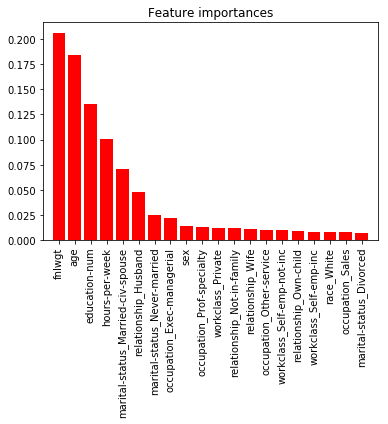

In [85]:
d_first = 20
plt.title("Feature importances")
plt.bar(range(d_first), importances[indices[:d_first]], align = 'center', color = 'r')
plt.xticks(range(d_first), feature_names[indices[:d_first]], rotation = 90)
plt.xlim([-1, d_first])

Использование только признаков
`age`, `hourse-per-week`, `education-num`, `marital-status`, `relationship`, `occupation`
существенно улучшает точность (понижает ошибку до 16-19%) на алгоритмах kNN и SVC.
На самом деле, решающую роль играет удаление признака `fnlwgt`

# Extremely Randomized Trees

In [86]:
ert = ensemble.ExtraTreesClassifier(n_estimators = 100).fit(X_train, y_train)

err_train = np.mean(y_train != ert.predict(X_train))
err_test  = np.mean(y_test  != ert.predict(X_test))

print(err_train, err_test)

4.3875043875e-05 0.182311393183


# AdaBoost

In [87]:
ada = ensemble.AdaBoostClassifier(n_estimators = 1000)
ada.fit(X_train, y_train)

err_train = np.mean(y_train != ada.predict(X_train))
err_test = np.mean(y_test != ada.predict(X_test))

print(err_train, err_test)

0.159178659179 0.157948612959


# GBT

In [88]:
gbt = ensemble.GradientBoostingClassifier(n_estimators = 1000)
gbt.fit(X_train, y_train)

err_train = np.mean(y_train != gbt.predict(X_train))
err_test = np.mean(y_test != gbt.predict(X_test))

print(err_train, err_test)

0.125351000351 0.156106049749
